In [11]:
import matplotlib.pyplot as plt
import torch
import numpy as np

In [7]:
state_dict = torch.load('../../logs/roller_skating_id/May03_23-00-18_SAVE_THIS_FRIC1/model_5000.pt')

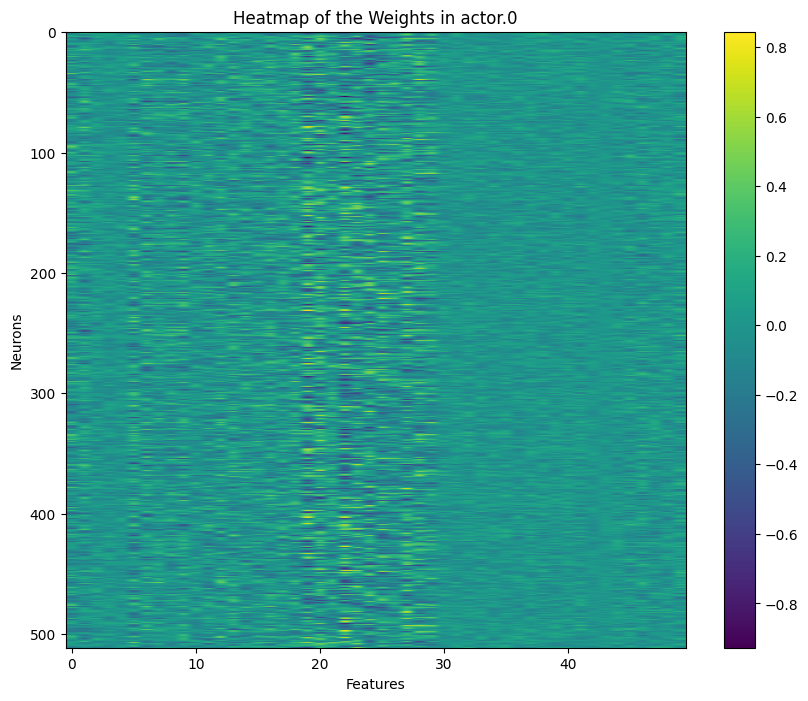

In [8]:
weights = state_dict['model_state_dict']['actor.0.weight'].cpu().numpy()
plt.figure(figsize=(10, 8))
plt.imshow(weights, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('Heatmap of the Weights in actor.0')
plt.xlabel('Features')
plt.ylabel('Neurons')
plt.show()


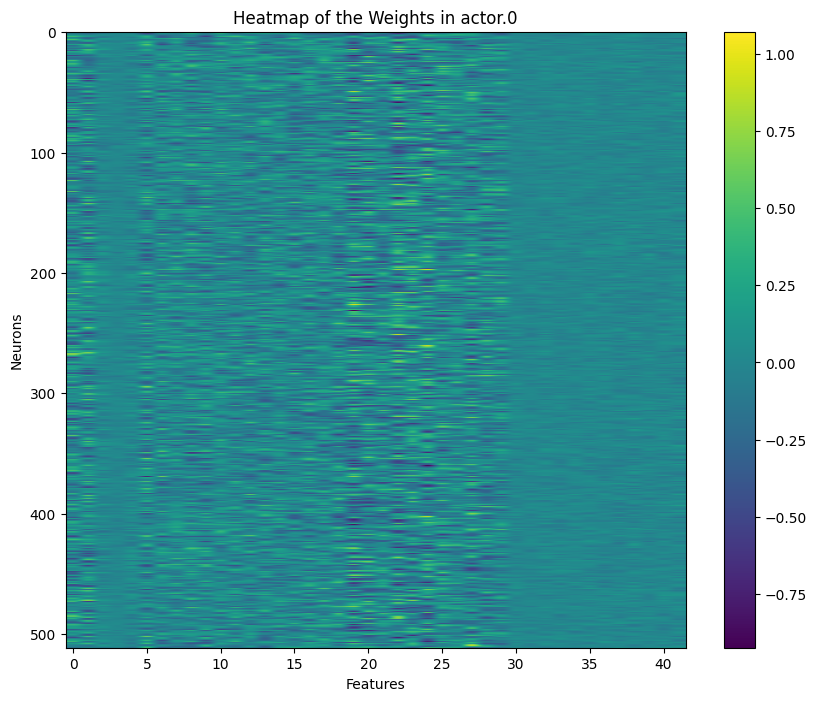

In [9]:
state_dict = torch.load('../../logs/roller_skating_asac/May02_21-41-38_SAVE_THIS_IT_WORKS/model_5000.pt')
weights = state_dict['model_state_dict']['actor.0.weight'].cpu().numpy()
plt.figure(figsize=(10, 8))
plt.imshow(weights, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('Heatmap of the Weights in actor.0')
plt.xlabel('Features')
plt.ylabel('Neurons')
plt.show()

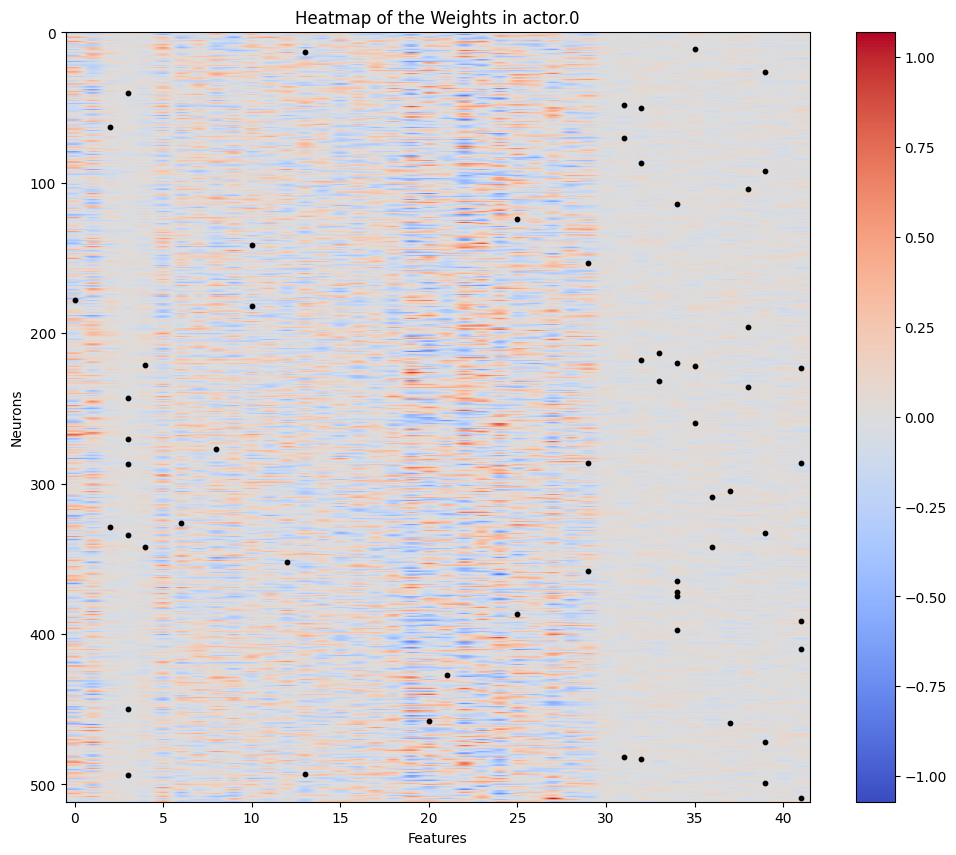

In [28]:
state_dict = torch.load('../../logs/roller_skating_asac/May02_21-41-38_SAVE_THIS_IT_WORKS/model_5000.pt')
weights = state_dict['model_state_dict']['actor.0.weight'].cpu().numpy()

vmin = weights.min()
vmax = weights.max()

# Create the heatmap with a diverging colormap
# plt.figure(figsize=(12, 10))
# cmap = plt.get_cmap('coolwarm')  # A diverging colormap

# # Normalization centered around zero, adjust to your data
# norm = plt.Normalize(vmin=-1, vmax=1)  # You may want to customize this based on the actual weight range

# # Create the heatmap
# cax = plt.imshow(weights, aspect='auto', cmap=cmap, norm=norm)
# plt.colorbar(cax)
# plt.title('Heatmap of the Weights in actor.0')
# plt.xlabel('Features')
# plt.ylabel('Neurons')

# # Optionally, add annotations to highlight weights near zero
# threshold = 0.001  # Adjust the threshold for highlighting close to zero weights
# for i in range(weights.shape[0]):
#     for j in range(weights.shape[1]):
#         if np.abs(weights[i, j]) < threshold:
#             plt.text(j, i, f'{weights[i, j]:.2f}', ha='center', va='center', color='black')

# plt.show()
plt.figure(figsize=(12, 10))
cmap = plt.get_cmap('coolwarm')  # A diverging colormap

# Normalization centered more tightly around zero
norm_range = max(abs(weights.min()), abs(weights.max()))
norm = plt.Normalize(vmin=-norm_range, vmax=norm_range)  # This will enhance contrast in the heatmap

# Create the heatmap
cax = plt.imshow(weights, aspect='auto', cmap=cmap, norm=norm)
plt.colorbar(cax)
plt.title('Heatmap of the Weights in actor.0')
plt.xlabel('Features')
plt.ylabel('Neurons')

# Threshold and dot appearance settings
threshold = 0.0005
dot_color = 'black'  # Changed to a darker color for better visibility
dot_size = 10  # Reduced size for less visual clutter

# Use dots to mark values close to zero
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        if np.abs(weights[i, j]) < threshold:
            plt.scatter(j, i, color=dot_color, s=dot_size)

plt.show()

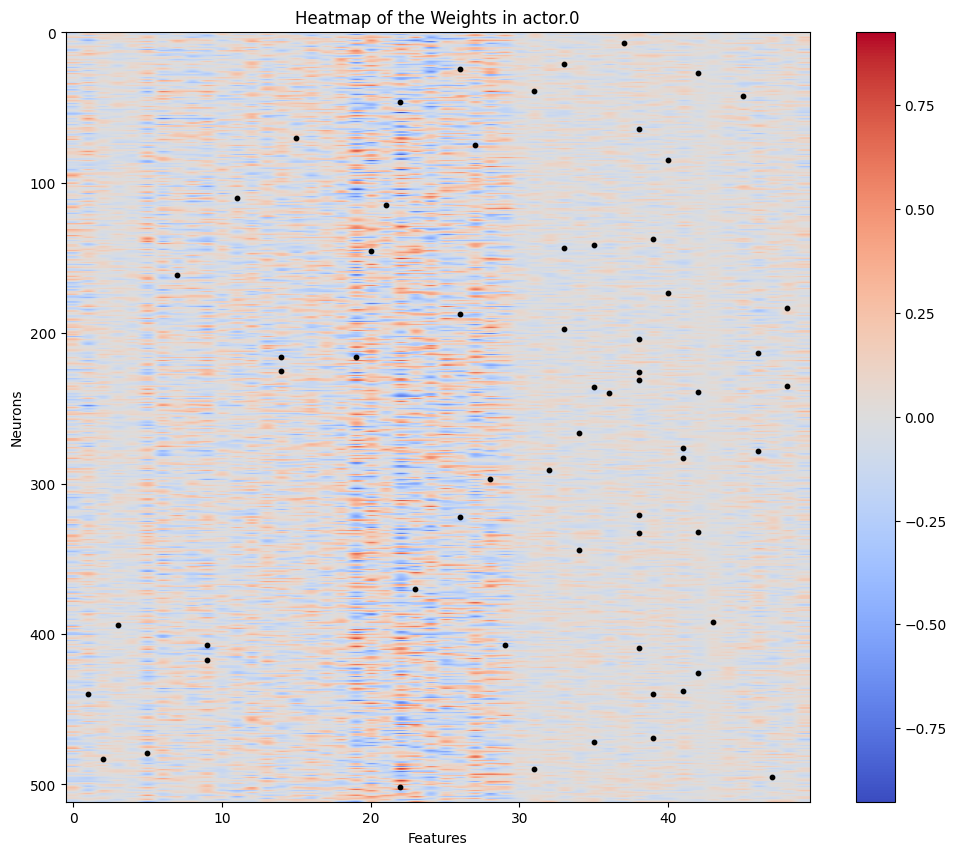

In [27]:
id_state_dict = torch.load('../../logs/roller_skating_id/May03_23-00-18_SAVE_THIS_FRIC1/model_5000.pt')
weights = id_state_dict['model_state_dict']['actor.0.weight'].cpu().numpy()

# plt.figure(figsize=(14, 12))  # Adjust figure size as needed
# cmap = plt.get_cmap('coolwarm')
# norm = plt.Normalize(vmin=-1, vmax=1)

# # Create the heatmap
# cax = plt.imshow(weights, aspect='auto', cmap=cmap, norm=norm)
# plt.colorbar(cax)
# plt.title('Heatmap of the Weights in actor.0')
# plt.xlabel('Features')
# plt.ylabel('Neurons')

# # Threshold for close to zero weights
# threshold = 0.005

# # Plotting dots for values close to zero
# dot_size = 50  # size of the dot, adjust as needed
# dot_color = 'white'  # color of the dot, adjust as needed

# for i in range(weights.shape[0]):
#     for j in range(weights.shape[1]):
#         if np.abs(weights[i, j]) < threshold:
#             plt.scatter(j, i, color=dot_color, s=dot_size)

# plt.show()
vmin = weights.min()
vmax = weights.max()

# Create the heatmap with a diverging colormap
plt.figure(figsize=(12, 10))
cmap = plt.get_cmap('coolwarm')  # A diverging colormap

# Normalization centered more tightly around zero
norm_range = max(abs(weights.min()), abs(weights.max()))
norm = plt.Normalize(vmin=-norm_range, vmax=norm_range)  # This will enhance contrast in the heatmap

# Create the heatmap
cax = plt.imshow(weights, aspect='auto', cmap=cmap, norm=norm)
plt.colorbar(cax)
plt.title('Heatmap of the Weights in actor.0')
plt.xlabel('Features')
plt.ylabel('Neurons')

# Threshold and dot appearance settings
threshold = 0.0005
dot_color = 'black'  # Changed to a darker color for better visibility
dot_size = 10  # Reduced size for less visual clutter

# Use dots to mark values close to zero
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        if np.abs(weights[i, j]) < threshold:
            plt.scatter(j, i, color=dot_color, s=dot_size)

plt.show()

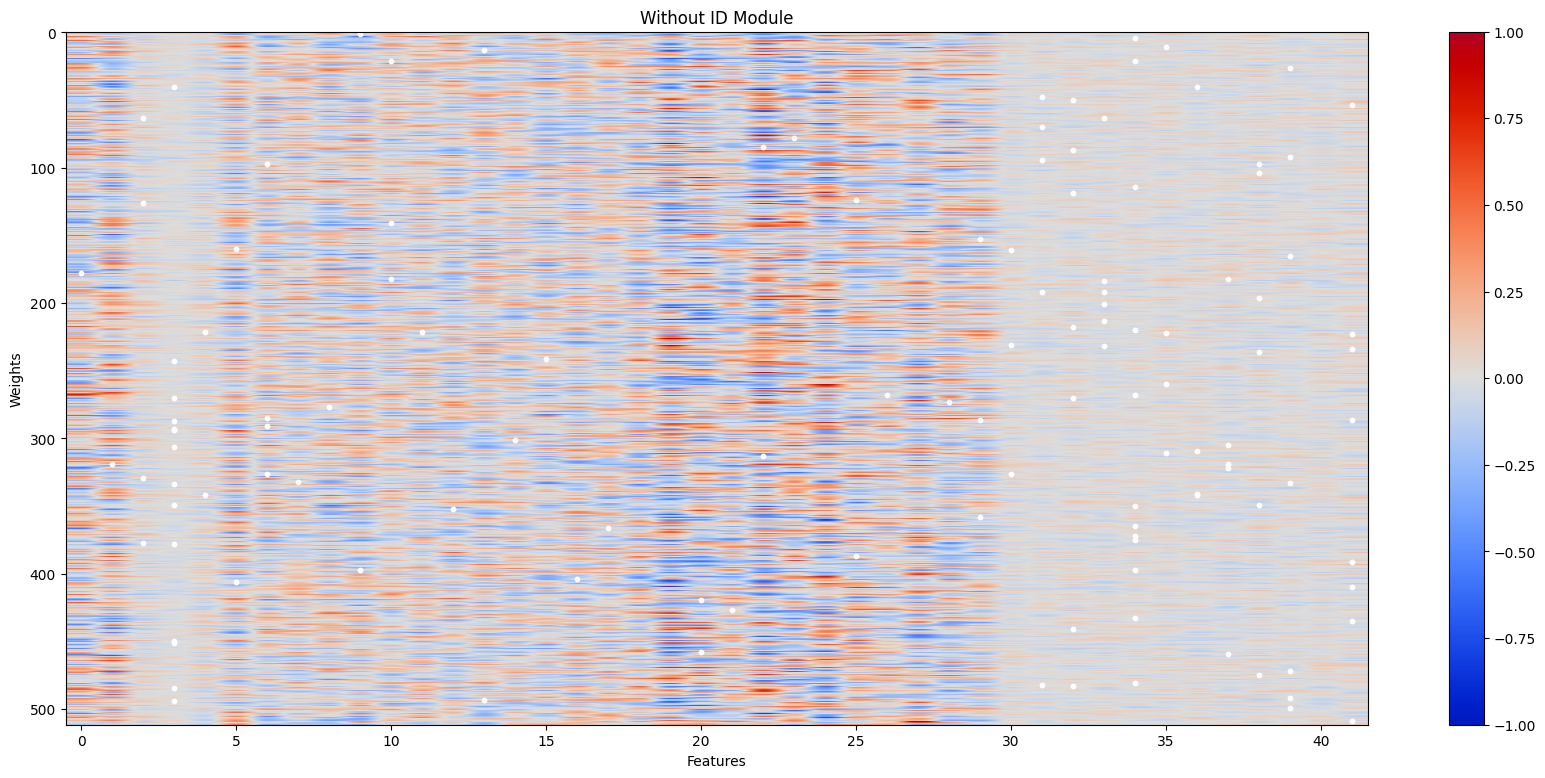

In [53]:
state_dict = torch.load('../../logs/roller_skating_asac/May02_21-41-38_SAVE_THIS_IT_WORKS/model_5000.pt')
weights = state_dict['model_state_dict']['actor.0.weight'].cpu().numpy()

import torch
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

from matplotlib.colors import LinearSegmentedColormap

def adjust_saturation(cmap, increase_factor=1.5):
    colors = cmap(np.arange(cmap.N))
    # Increase color saturation
    rgb = colors[:, :3]
    hsv = mcolors.rgb_to_hsv(rgb)
    hsv[:, 1] = np.clip(hsv[:, 1] * increase_factor, 0, 1)  # Increase and clip the saturation channel
    rgb_new = mcolors.hsv_to_rgb(hsv)
    colors[:, :3] = np.clip(rgb_new, 0, 1)  # Ensure all RGB values are within the valid range
    return LinearSegmentedColormap.from_list('adjusted_coolwarm', colors, cmap.N)

# Applying the adjusted colormap
adjusted_cmap = adjust_saturation(plt.get_cmap('coolwarm'))

# Create the heatmap with the adjusted diverging colormap
plt.figure(figsize=(21, 9))
norm = plt.Normalize(vmin=-1, vmax=1)  # Adjust this range if needed to match your data's range more closely
cax = plt.imshow(weights, aspect='auto', cmap=adjusted_cmap, norm=norm)
plt.colorbar(cax)
plt.title('Without ID Module')
plt.xlabel('Features')
plt.ylabel('Weights')

# Threshold and dot appearance settings
threshold = 0.001
dot_color = 'white'  # Changed to white for contrast
dot_size = 10  # Reduced dot size for better visibility

# Use dots to mark values close to zero
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        if np.abs(weights[i, j]) < threshold:
            plt.scatter(j, i, color=dot_color, s=dot_size)

plt.show()


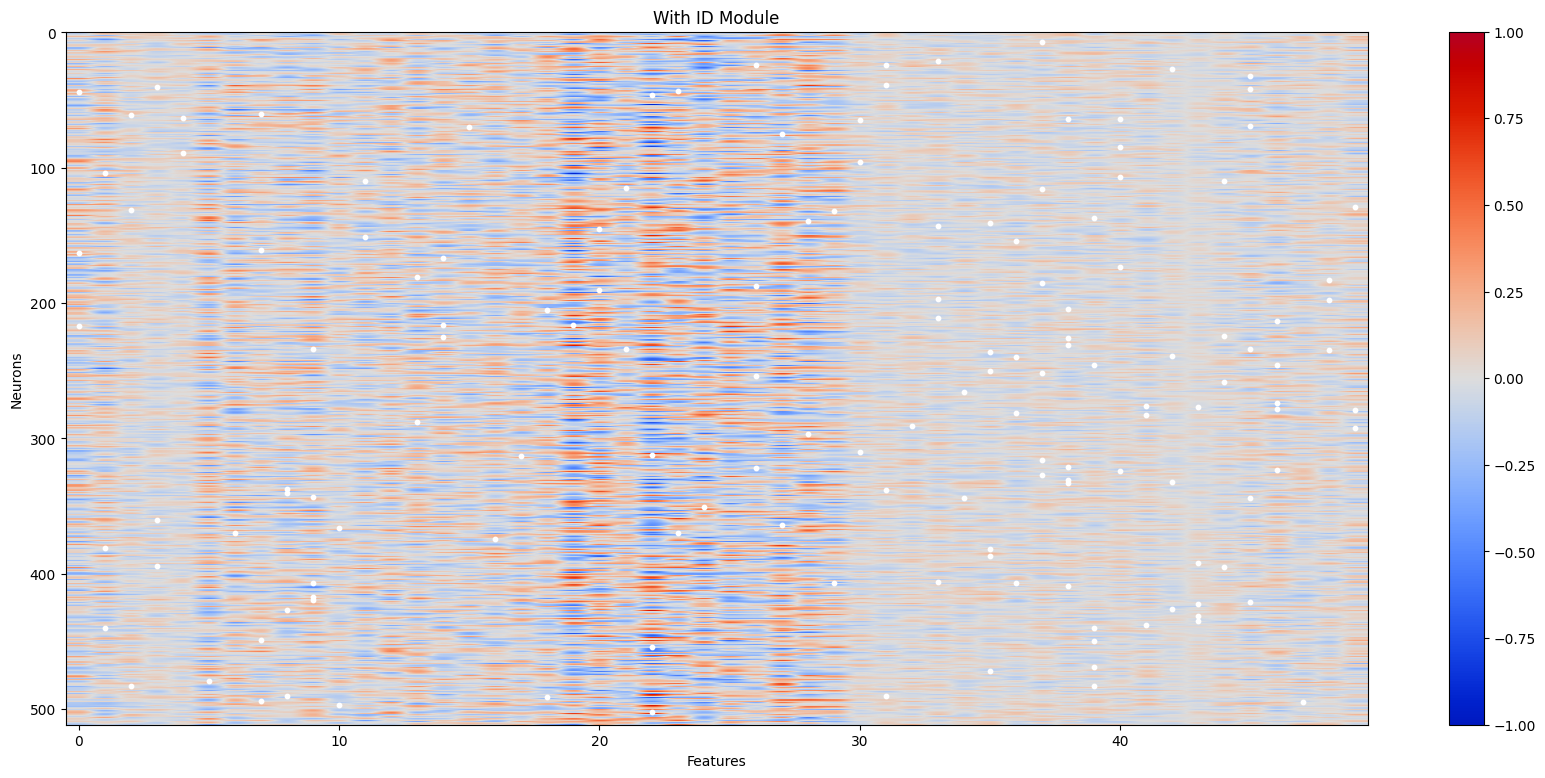

In [54]:
id_state_dict = torch.load('../../logs/roller_skating_id/May03_23-00-18_SAVE_THIS_FRIC1/model_5000.pt')
weights = id_state_dict['model_state_dict']['actor.0.weight'].cpu().numpy()

adjusted_cmap = adjust_saturation(plt.get_cmap('coolwarm'))

# Create the heatmap with the adjusted diverging colormap
plt.figure(figsize=(21, 9))
norm = plt.Normalize(vmin=-1, vmax=1)  # Adjust this range if needed to match your data's range more closely
cax = plt.imshow(weights, aspect='auto', cmap=adjusted_cmap, norm=norm)
plt.colorbar(cax)
plt.title('With ID Module')
plt.xlabel('Features')
plt.ylabel('Neurons')

# Threshold and dot appearance settings
threshold = 0.001
dot_color = 'white'  # Changed to white for contrast
dot_size = 10  # Reduced dot size for better visibility

# Use dots to mark values close to zero
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        if np.abs(weights[i, j]) < threshold:
            plt.scatter(j, i, color=dot_color, s=dot_size)

plt.show()


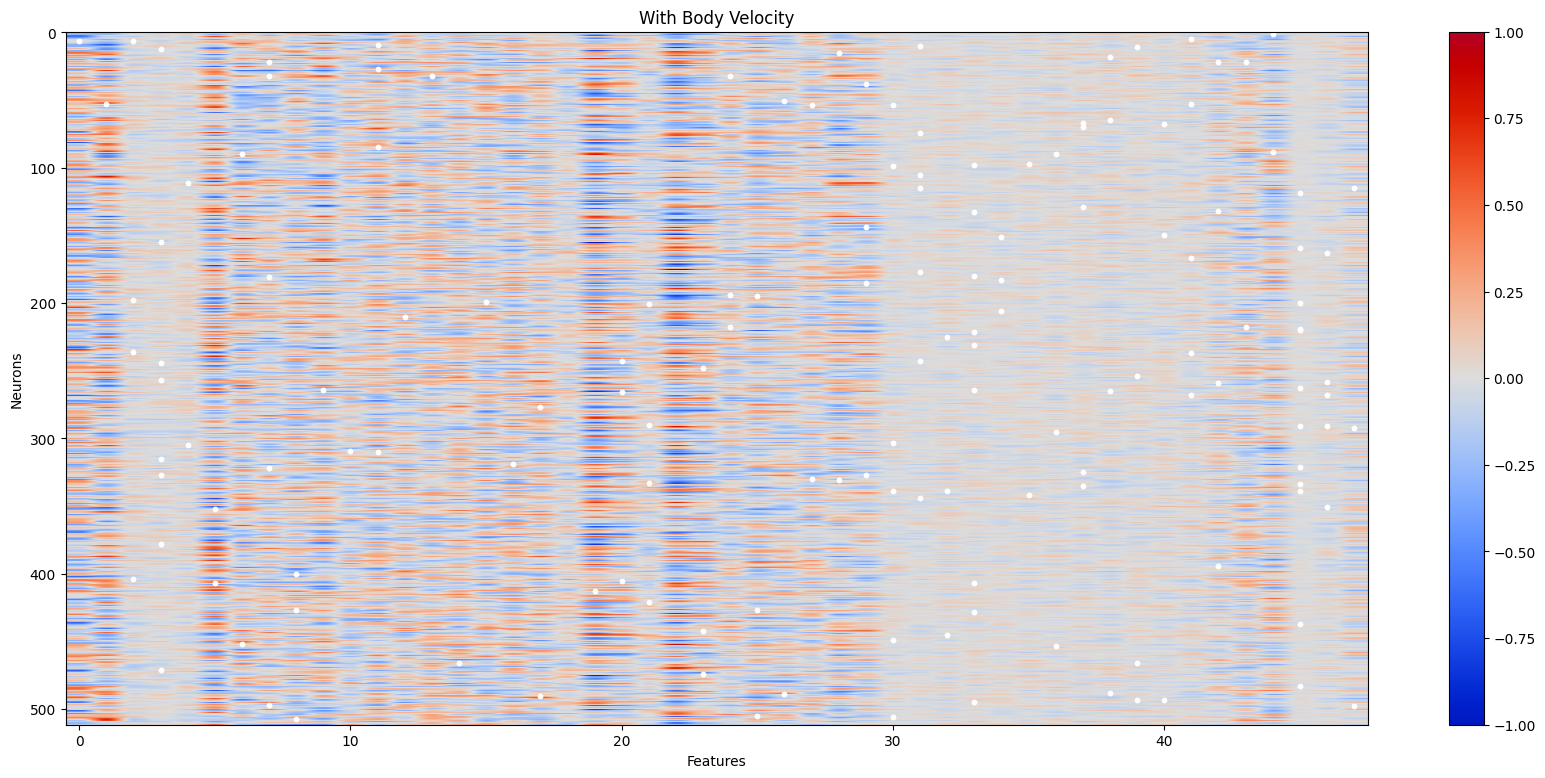

In [55]:
id_state_dict = torch.load('../../logs/roller_skating_asac/May08_22-58-34_/model_5000.pt')
weights = id_state_dict['model_state_dict']['actor.0.weight'].cpu().numpy()

adjusted_cmap = adjust_saturation(plt.get_cmap('coolwarm'))

# Create the heatmap with the adjusted diverging colormap
plt.figure(figsize=(21, 9))
norm = plt.Normalize(vmin=-1, vmax=1)  # Adjust this range if needed to match your data's range more closely
cax = plt.imshow(weights, aspect='auto', cmap=adjusted_cmap, norm=norm)
plt.colorbar(cax)
plt.title('With Body Velocity')
plt.xlabel('Features')
plt.ylabel('Neurons')

# Threshold and dot appearance settings
threshold = 0.001
dot_color = 'white'  # Changed to white for contrast
dot_size = 10  # Reduced dot size for better visibility

# Use dots to mark values close to zero
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        if np.abs(weights[i, j]) < threshold:
            plt.scatter(j, i, color=dot_color, s=dot_size)

plt.show()